# Imports, acquire data and data prep:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report,
 confusion_matrix, accuracy_score, precision_score, recall_score)
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

import acquire, prepare

In [2]:
#Get titanic data set
titanic = acquire.get_titanic_data()

In [3]:
#Prepare titanic data for processing
titanic = prepare.prep_titanic(titanic)

In [4]:
#Split the data into train, validate and test sets
train, val, test = prepare.train_validate(titanic, 'survived')

In [5]:
#Seperate the target columns in each set for input into the algorithm
X_train = train.drop(columns='survived')
y_train = train.survived

X_val = val.drop(columns='survived')
y_val = val.survived

X_test = test.drop(columns='survived')
y_test = test.survived

In [6]:
#Shows that deceased is our baseline:
train.survived.value_counts()

0    192
1    119
Name: survived, dtype: int64

# KNN Exercises:

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
knn.score(X_train, y_train)

0.8102893890675241

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [9]:
knn.score(X_val,y_val)

0.7403846153846154

In [10]:
y_pred = knn.predict(X_train)

In [11]:
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True, target_names = ['deceased', 'survived']))

In [12]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,159,33
1,26,93


In [13]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(159, 33, 26, 93)

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [14]:
class_report

,deceased,survived,accuracy,macro avg,weighted avg
precision,0.859459,0.738095,0.810289,0.798777,0.813021
recall,0.828125,0.781513,0.810289,0.804819,0.810289
f1-score,0.843501,0.759184,0.810289,0.801342,0.811238
support,192.000000,119.000000,0.810289,311.000000,311.000000


In [15]:
#What do they mean "rate"?

4. Run through steps 1-3 setting k to 10

In [16]:
knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [17]:
knn2.score(X_train, y_train)

0.7652733118971061

In [18]:
y_pred2 = knn2.predict(X_train)

In [19]:
class_report2 = pd.DataFrame(classification_report(y_train, y_pred2, output_dict=True, target_names = ['deceased', 'survived']))
class_report2

,deceased,survived,accuracy,macro avg,weighted avg
precision,0.784689,0.725490,0.765273,0.755090,0.762037
recall,0.854167,0.621849,0.765273,0.738008,0.765273
f1-score,0.817955,0.669683,0.765273,0.743819,0.761221
support,192.000000,119.000000,0.765273,311.000000,311.000000


In [20]:
pd.DataFrame(confusion_matrix(y_train, y_pred2))

,0,1
0,164,28
1,45,74


In [21]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred2).ravel()
tn, fp, fn, tp

(164, 28, 45, 74)

5. Run through steps 1-3 setting k to 20

In [22]:
knn3 = KNeighborsClassifier(n_neighbors=20)
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [23]:
knn3.score(X_train, y_train)

0.7266881028938906

In [24]:
y_pred3 = knn3.predict(X_train)

In [25]:
class_report3 = pd.DataFrame(classification_report(y_train, y_pred3, output_dict=True, target_names = ['deceased', 'survived']))
class_report3

,deceased,survived,accuracy,macro avg,weighted avg
precision,0.723849,0.736111,0.726688,0.729980,0.728541
recall,0.901042,0.445378,0.726688,0.673210,0.726688
f1-score,0.802784,0.554974,0.726688,0.678879,0.707963
support,192.000000,119.000000,0.726688,311.000000,311.000000


In [26]:
pd.DataFrame(confusion_matrix(y_train, y_pred3))

,0,1
0,173,19
1,66,53


In [27]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred3).ravel()
tn, fp, fn, tp

(173, 19, 66, 53)

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [34]:
print("---------------------------------------------------------------------")
print(class_report)
print("---------------------------------------------------------------------")
print(class_report2)
print("---------------------------------------------------------------------")
print(class_report3)
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
             deceased    survived  accuracy   macro avg  weighted avg
precision    0.859459    0.738095  0.810289    0.798777      0.813021
recall       0.828125    0.781513  0.810289    0.804819      0.810289
f1-score     0.843501    0.759184  0.810289    0.801342      0.811238
support    192.000000  119.000000  0.810289  311.000000    311.000000
---------------------------------------------------------------------
             deceased    survived  accuracy   macro avg  weighted avg
precision    0.784689    0.725490  0.765273    0.755090      0.762037
recall       0.854167    0.621849  0.765273    0.738008      0.765273
f1-score     0.817955    0.669683  0.765273    0.743819      0.761221
support    192.000000  119.000000  0.765273  311.000000    311.000000
---------------------------------------------------------------------
             deceased    survived  accuracy   macro avg  weighted avg
precision    0.72384

- Model 1 preformed the best with the training data.

7. Which model performs best on our out-of-sample data from validate?

In [48]:
print("-----------------------------------------------------------------------------")
print(f'Model 1 accuracy with the training set is: {knn.score(X_train, y_train) * 100:.1f}% and validation set is: {knn.score(X_val, y_val)*100:.1f}%')
print("-----------------------------------------------------------------------------")
print(f'Model 2 accuracy with the training set is: {knn2.score(X_train, y_train)*100:.1f}% and validation set is: {knn2.score(X_val, y_val)*100:.1f}%')
print("-----------------------------------------------------------------------------")
print(f'Model 3 accuracy with the training set is: {knn3.score(X_train, y_train)*100:.1f}% and validation set is: {knn3.score(X_val, y_val)*100:.1f}%')
print("-----------------------------------------------------------------------------")

-----------------------------------------------------------------------------
Model 1 accuracy with the training set is: 81.0% and validation set is: 74.0%
-----------------------------------------------------------------------------
Model 2 accuracy with the training set is: 76.5% and validation set is: 74.7%
-----------------------------------------------------------------------------
Model 3 accuracy with the training set is: 72.7% and validation set is: 70.8%
-----------------------------------------------------------------------------


- It appears model 2 performs the best or has the lowest difference between the training and validation sets.

In [53]:
metrics = []

for i in range(1, 50):
    knn_5 = KNeighborsClassifier(n_neighbors=i)
    knn_5 = knn_5.fit(X_train, y_train)
    in_sample_accuracy = knn_5.score(X_train, y_train)
    out_of_sample_accuracy = knn_5.score(X_val, y_val)

    output = {"max_depth" : i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    metrics.append(output)

df = pd.DataFrame(metrics)              
df['difference'] = df.train_accuracy - df.validate_accuracy              
#df              


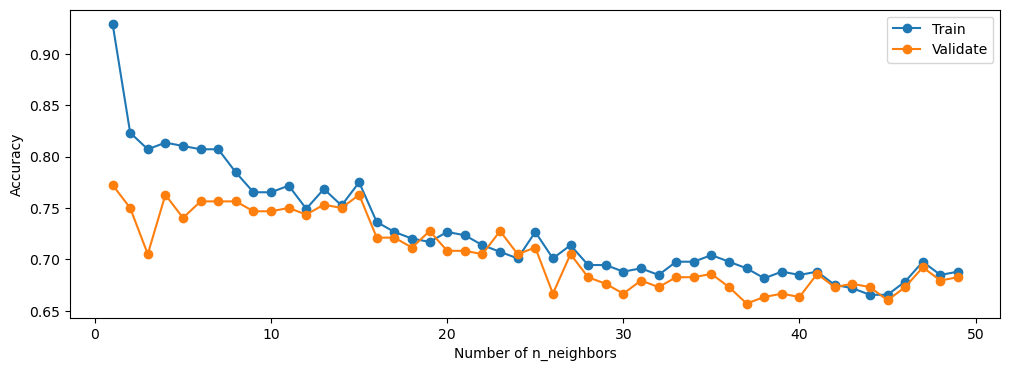

In [55]:

plt.figure(figsize=(12,4))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label= 'Validate')
plt.legend()
plt.xlabel("Number of n_neighbors")
plt.ylabel("Accuracy")
plt.show()
